In [66]:
import pandas as pd
import datetime as dt

df = pd.read_csv("fact_Player2.csv", sep=";", dtype={'injury_rate':'str', 'injury_status':'str'})
df["save_date"] = pd.to_datetime(df['save_date'], dayfirst=True)
date = pd.to_datetime("30.05.2021", dayfirst=True) # df["save_date"].max()
df = df[df["save_date"] == date]
pd.set_option('display.max_columns',None)
df.head()


,Name,Position,player_ID,save_date,transaction_ID,club,value,prognosis,total_points,points_volatility,historical_point_yield,last_points,suggestion,value_change_L7D,team_value_change_L7D,value_change_L3M,rated_games,injury_rate,injury_status,fav_team_nomination,dreamteam_nomination,club_rank
135609,Scott,Mittelfeld,33387.0,2021-05-30,2.021053e+12,FC Bayern München,620000.0,630000,1.0,niedrig,Gering bis mittel,NaN,Halten,"+160000 / +34,8%","-30320000 / -19,1%",Unbekannt,2.0,Niedrig,NaN,NaN,NaN,1.0
135610,Trapp,Torhüter,31621.0,2021-05-30,2.021053e+12,Eintracht Frankfurt,1410000.0,1410000,78.0,mittel,Gering bis mittel,NaN,Halten,"-220000 / -13,5%","-21540000 / -26,5%","-1040000 / -42,4%",33.0,Niedrig,NaN,NaN,1.0,5.0
135611,Moukoko,Stürmer,33260.0,2021-05-30,2.021053e+12,Borussia Dortmund,1780000.0,1750000,33.0,mittel,Gering bis mittel,NaN,Halten,"+610000 / +52,1%","-31300000 / -20,2%","-2560000 / -59,0%",13.0,Hoch,NaN,NaN,NaN,3.0
135612,Kalajdžić,Stürmer,33246.0,2021-05-30,2.021053e+12,VfB Stuttgart,11340000.0,11240000,168.0,niedrig,Gering bis mittel,1.0,Halten,"-1880000 / -14,2%","-9940000 / -15,8%","-1870000 / -14,2%",32.0,Niedrig,NaN,NaN,2.0,9.0
135613,Ahamada,Mittelfeld,33347.0,2021-05-30,2.021053e+12,VfB Stuttgart,500000.0,510000,-7.0,niedrig,Gering bis mittel,-2.0,Halten,"-50000 / -9,1%","-9940000 / -15,8%","-10000 / -2,0%",6.0,Niedrig,NaN,NaN,NaN,9.0


In [67]:
from sklearn.model_selection import train_test_split

X = df[["value"]].values
Y = df[["total_points"]].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0, test_size=0.2)

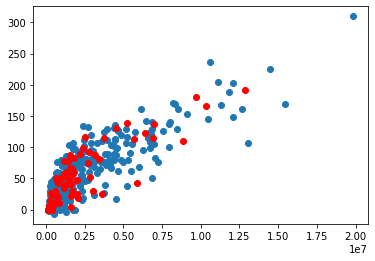

In [68]:
import matplotlib.pyplot as plt

plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test, color="red")
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Inter: "+str(model.intercept_))
print("Coef: "+ str(model.coef_))

Inter: [18.55672491]
Coef: [[1.46488551e-05]]


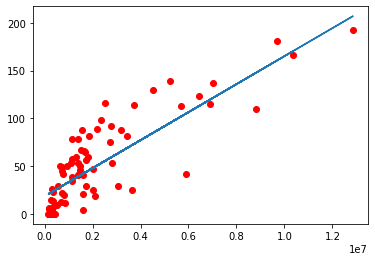

In [72]:
predicted = model.predict(X_test)

plt.scatter(X_test,Y_test, color="red")
plt.plot(X_test,predicted)
plt.show()